# **Preparação**

In [58]:
#Importação de pacotes
import pandas as pd
import statistics as sts
import matplotlib.pyplot as plt
plt.style.use('seaborn')


In [59]:
# importando o dataframe
df = pd.read_excel('AdventureWorks.xlsx')

In [60]:
# Visualizar
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [61]:
# Visualisar tamanho
df.shape

(904, 16)

In [62]:
# Analisar os tipos de dados
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

# **Analise Exploratoria**

In [63]:
# Total de receita
df['Valor Venda'].sum()

5984606.1426

In [64]:
# Total de descontos
df['Valor Desconto'].sum()

622967.4574

In [65]:
# Qual custo total por linha
# criando uma nova coluna
df['Custo'] = df['Custo Unitário'].mul(df['Quantidade'])

In [66]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48"


In [67]:
# Custo total
df['Custo'].sum()

2486783.05

In [68]:
df['Lucro'] = df['Valor Venda'] - df['Valor Desconto'] - df['Custo']

In [69]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52"


In [70]:
# Total de Lucro
df['Lucro'].sum()

2874855.6352000004

In [71]:
# Criando uma coluna com o total de dias para o envio
df['Tempo Envio'] = df['Data Envio'] - df['Data Venda']

In [72]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20 days


In [73]:
#Transformando coluna tempo envio em numero para analise estatistica
df['Tempo Envio'] = (df['Data Envio'] - df['Data Venda']).dt.days

In [74]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [75]:
df['Tempo Envio'].dtypes

dtype('int64')

In [76]:
#media do tempo de envio por marca
df.groupby('Marca')['Tempo Envio'].mean()

Marca
Adventure Works                   8.66
Contoso                           8.47
Fabrikam                          8.51
Name: Tempo Envio, dtype: float64

In [77]:
#Verificando se ha valores faltentes
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
Lucro             0
Tempo Envio       0
dtype: int64

In [78]:
#Lucro por ano e por marca
df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum()

Data Venda  Marca          
2008        Adventure Works             241,528.96
            Contoso                      41,130.30
            Fabrikam                  1,344,984.43
2009        Adventure Works             308,022.40
            Contoso                     102,043.60
            Fabrikam                    837,145.94
Name: Lucro, dtype: float64

In [79]:
#Padronizando os tipos de dados em float 
pd.options.display.float_format = '{:20,.2f}'.format

In [80]:
#Resetando o index, para analisar os dados em tabelas
lucro_ano = df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum().reset_index()
lucro_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"241,528.96"
1,2008,Contoso,"41,130.30"
2,2008,Fabrikam,"1,344,984.43"
3,2009,Adventure Works,"308,022.40"
4,2009,Contoso,"102,043.60"
5,2009,Fabrikam,"837,145.94"


In [81]:
#Qual o quantidade de cada tipo de produto
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

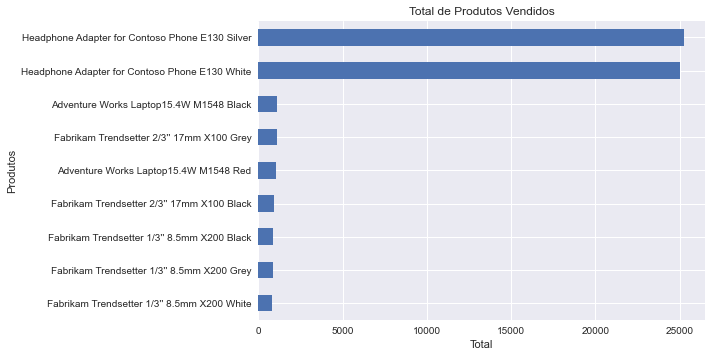

In [82]:
#Grafico Total de Produtos vendidos.
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending = True).plot.barh(title = 'Total de Produtos Vendidos')
plt.xlabel('Total')
plt.ylabel('Produtos');

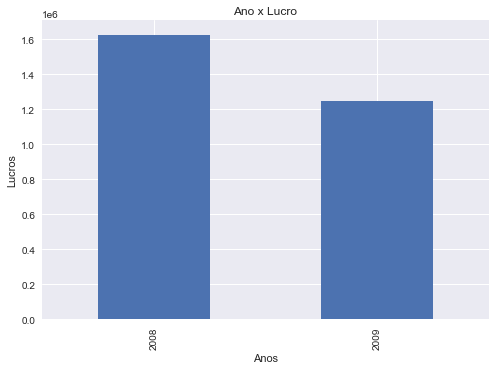

In [96]:
#Construção do grafico da soma total do lucro de cada ano
df.groupby(df['Data Venda'].dt.year)['Lucro'].sum().plot.bar(title = 'Ano x Lucro')
plt.xlabel('Anos')
plt.ylabel('Lucros');

In [97]:
#Verificar em valores
df.groupby(df['Data Venda'].dt.year)['Lucro'].sum()

Data Venda
2008           1,627,643.69
2009           1,247,211.94
Name: Lucro, dtype: float64

In [84]:
#Selecionando o ano de 2019
df_2009 = df[df['Data Venda'].dt.year == 2009]

In [85]:
#Verificar df
df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


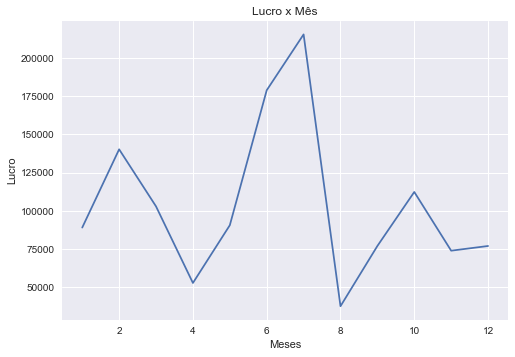

In [86]:
#Lucro por mês em 2009 com grafico
df_2009.groupby(df_2009['Data Venda'].dt.month)['Lucro'].sum().plot(title="Lucro x Mês")
plt.xlabel('Meses')
plt.ylabel('Lucro');

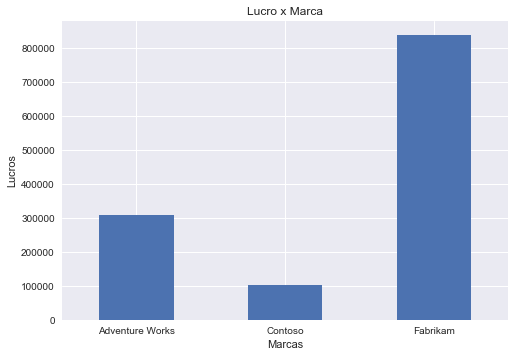

In [87]:
#Analizar lucro por cada marca em 2009
df_2009.groupby('Marca')['Lucro'].sum().plot.bar(title = "Lucro x Marca")
plt.xlabel('Marcas')
plt.ylabel('Lucros')
plt.xticks(rotation='horizontal');

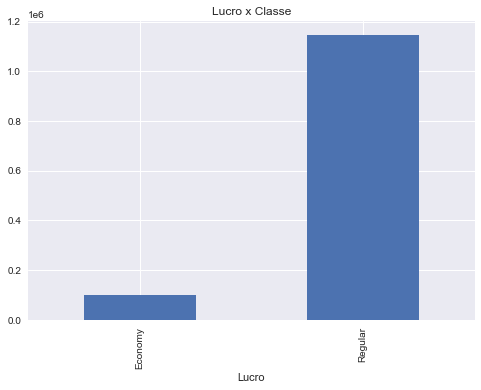

In [88]:
#Analizar o lucro pela classe de produto vendida
df_2009.groupby('Classe')['Lucro'].sum().plot.bar(title = 'Lucro x Classe')
plt.xlabel('Classes')
plt.xlabel('Lucro');

In [89]:
#Informações estatisticas sobre o Tempo de envio
df['Tempo Envio'].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo Envio, dtype: float64

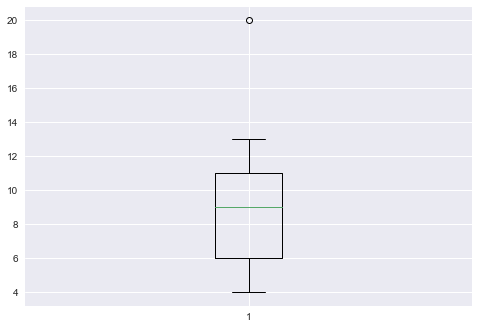

In [90]:
#Grafico de boxplot com o Tempo de envio
plt.boxplot(df['Tempo Envio']);

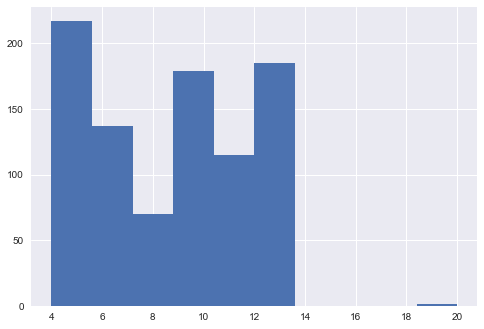

In [91]:
#Grafico de histograma com o Tempo de envio
plt.hist(df['Tempo Envio']);

In [92]:
#Tempo minimo de envio
df['Tempo Envio'].min()

4

In [93]:
#Tempo maximo de envio
df['Tempo Envio'].max()

20

In [94]:
#Identificando um outlier
df[df['Tempo Envio'] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [98]:
#Salvando Dataframe como Tabela excel
df.to_csv('AdventureWorks(Tratado).csv')